#### Import statements

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import csv
import collections
import openpyxl
import os
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Reading Data & identifying any duplicate columns in dataset

In [3]:

with open('day.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    columns = next(reader)
    # printing total # of columns
    print('\nTotal # of columns available in loan dataset:', len(columns))
    count = collections.Counter(columns)
    duplicate_col = [name for name, cnt in count.items() if cnt > 1]
    # printing duplicate column names
    if duplicate_col:
        print('\nDuplicate column names:', duplicate_col)
    else:
        print('\nNo duplicate column names found')


Total # of columns available in loan dataset: 16

No duplicate column names found


#### Data Dict

In [4]:
'''

=========================================
Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
'''

'\n\n=========================================\nDataset characteristics\n=========================================\t\nday.csv have the following fields:\n\t\n\t- instant: record index\n\t- dteday : date\n\t- season : season (1:spring, 2:summer, 3:fall, 4:winter)\n\t- yr : year (0: 2018, 1:2019)\n\t- mnth : month ( 1 to 12)\n\t- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)\n\t- weekday : day of the week\n\t- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.\n\t+ weathersit : \n\t\t- 1: Clear, Few clouds, Partly cloudy, Partly cloudy\n\t\t- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist\n\t\t- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds\n\t\t- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog\n\t- temp : temperature in Celsius\n\t- atemp: feeling temperature in Celsius\n\t- hum: humidity\n\t- windspeed: wind speed\n\t- casual: count of 

#### creating a pandas df and checking for no of rows and columns

In [5]:
df=pd.read_csv('day.csv', low_memory=False)
print ('\nTotal # of rows and columns in day.csv file:', df.shape)


Total # of rows and columns in day.csv file: (730, 16)


In [6]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [8]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
# Verifying the dataset if there are any null values
nulls_in_A = df.isnull()
print(nulls_in_A.size)
true_count = nulls_in_A.values.ravel().tolist().count(True)
false_count = nulls_in_A.values.ravel().tolist().count(False)
print (true_count, false_count)

11680
0 11680


In [11]:
# Summarizing the # of missing values in the original dataset
100*(df.isnull().sum()/len(df.index))

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [12]:
# Renaming some column names for visualization purposes 
df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [13]:
df.columns

Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

## Data Analysis

In [14]:
# printing value count for each column in dataframe
for i in df.columns:
  print(i,df[i].value_counts(),"\n")

instant 1      1
480    1
482    1
483    1
484    1
      ..
246    1
247    1
248    1
249    1
730    1
Name: instant, Length: 730, dtype: int64 

dteday 01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64 

season 3    188
2    184
1    180
4    178
Name: season, dtype: int64 

year 0    365
1    365
Name: year, dtype: int64 

month 1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: month, dtype: int64 

holiday 0    709
1     21
Name: holiday, dtype: int64 

weekday 6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64 

workingday 1    499
0    231
Name: workingday, dtype: int64 

weathersit 1    463
2    246
3     21
Name: weathersit, dtype: int64 

temp 26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130

In [15]:
#Dropping all variables that are not required for model prediction
#'instant' variable is only the index 
#'dteday' can be ignored as we have separate column for year, month 
#'casual', 'registered' are nothing but sum of 'cnt' so this can be removed
df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

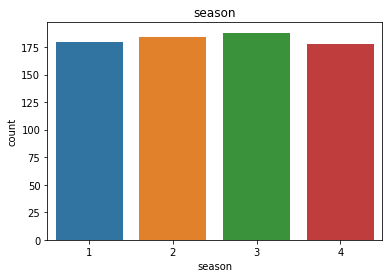

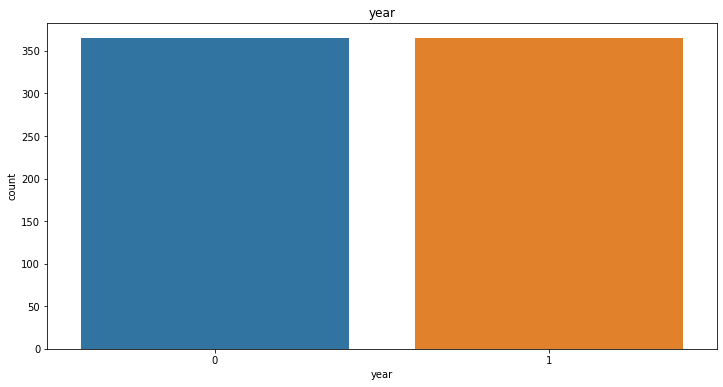

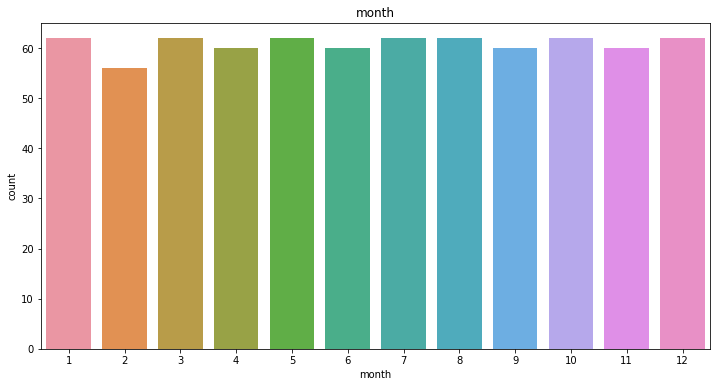

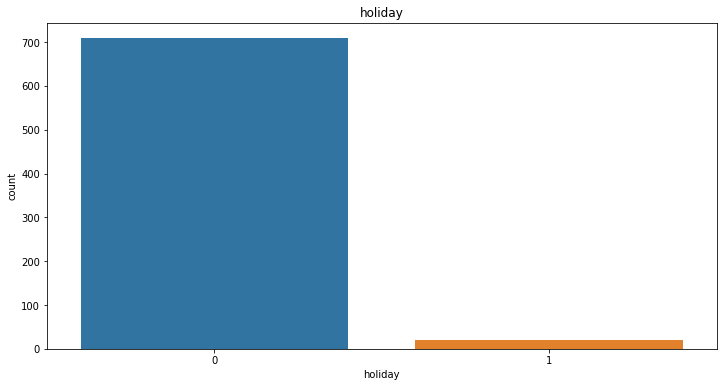

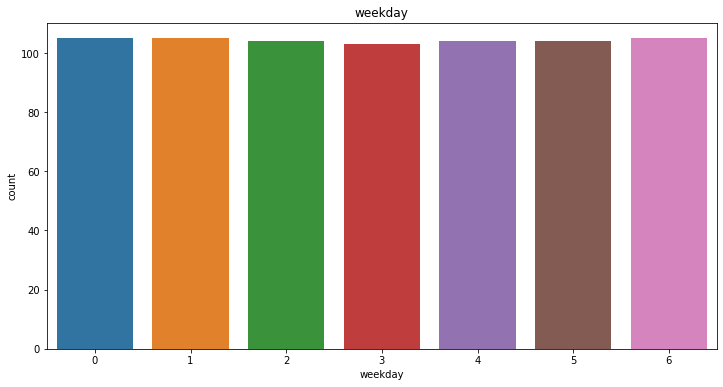

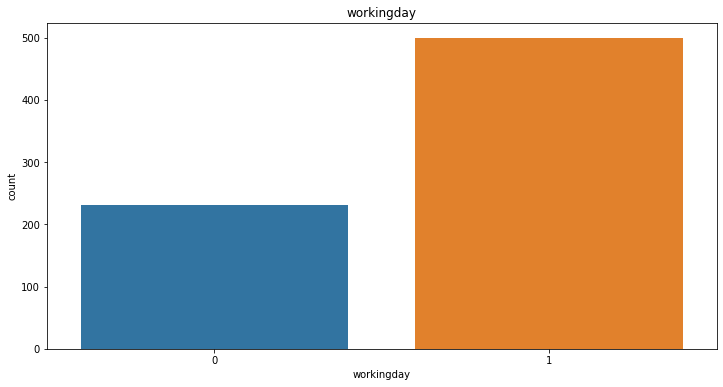

<Figure size 864x432 with 0 Axes>

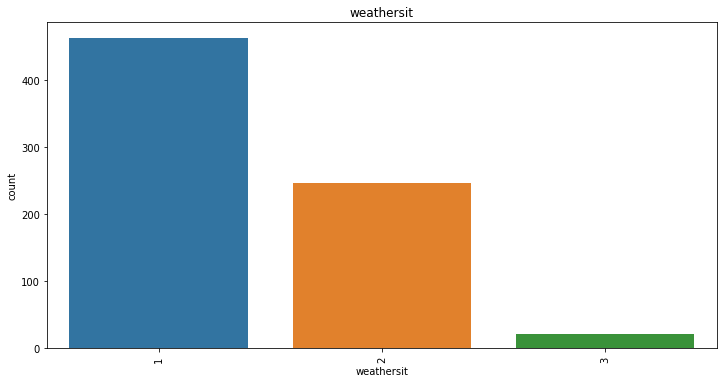

In [16]:
#declaring categorical var and displaying countplot of variables
cat_var = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit']
for i, var in enumerate(cat_var):
    plt.figure(figsize=(12,6))
    plt.figure(i)
    sns.countplot(x=var, data=df)
    plt.title(var)
plt.xticks(rotation=90)
plt.show()

#### Modifying the column values in the dataframe to readable format 

In [17]:
df['month'] = df['month'].replace({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
df['weekday'] = df['weekday'].replace({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
df['weathersit'] = df['weathersit'].replace({1:'Clear',2:'Cloudy',3:'Lightrain',4:'Heavysnow'})
df['season'] = df['season'].replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

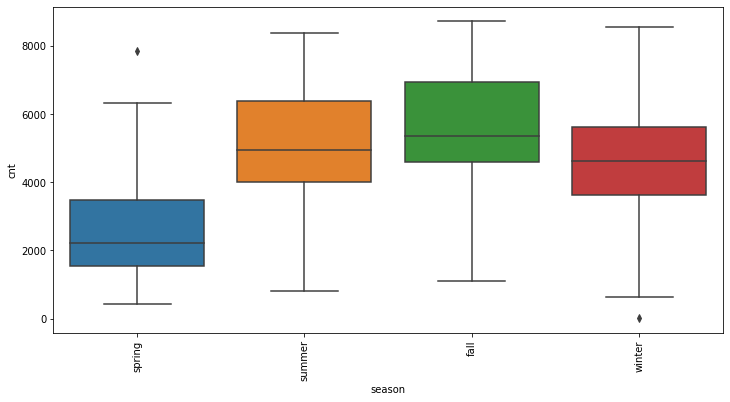

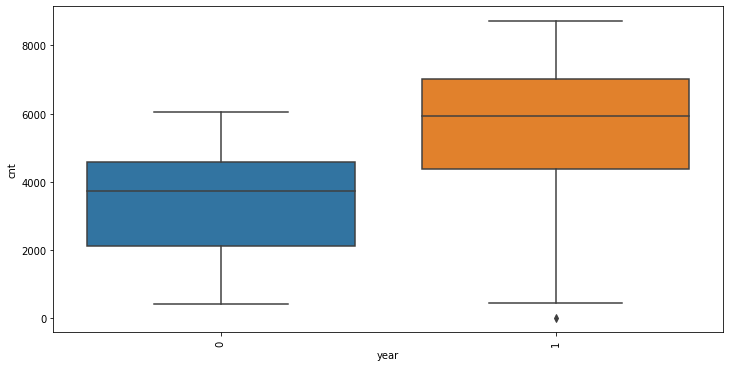

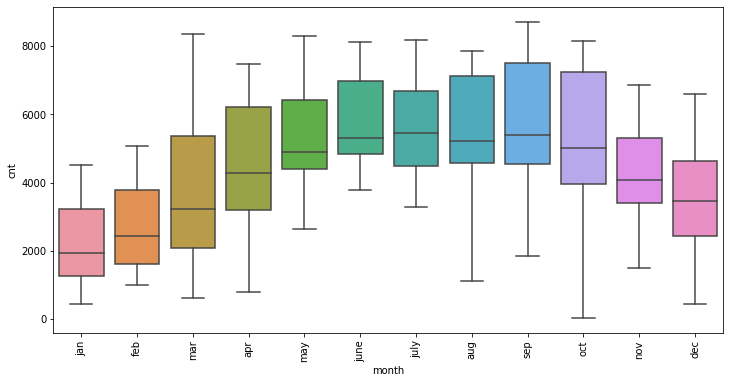

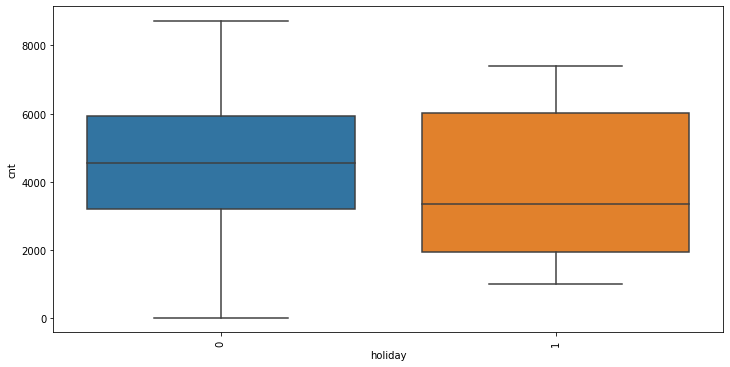

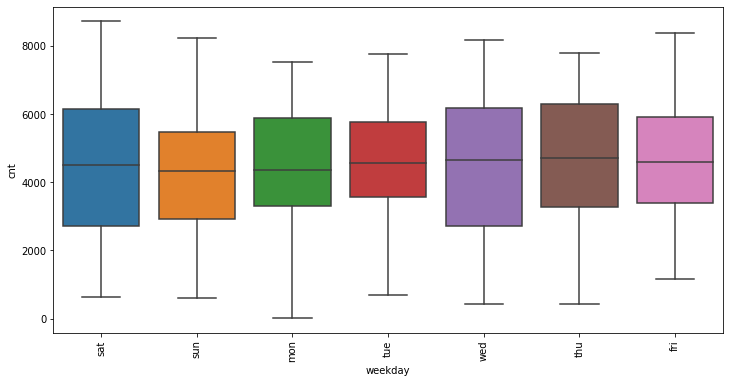

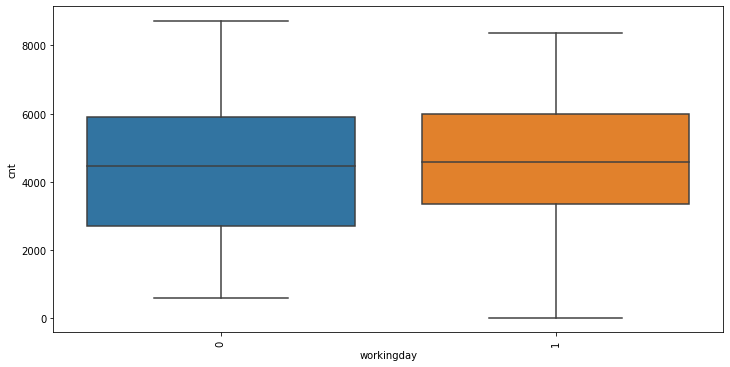

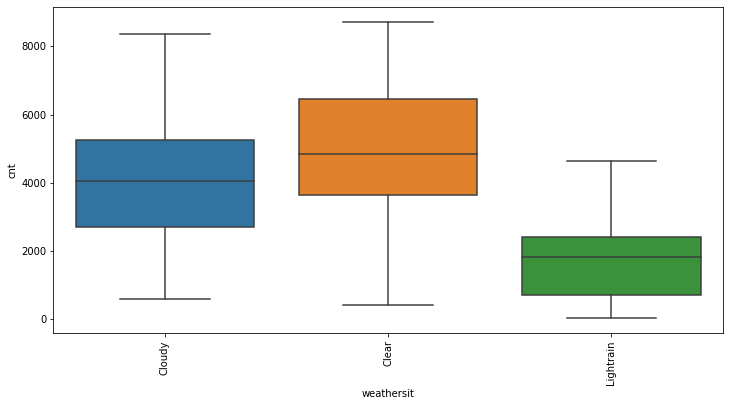

In [18]:
# Boxplot for Categorical variables against count
for i, var in enumerate(cat_var):
    plt.figure(figsize=(12,6))
    sns.boxplot(x=var, y='cnt', data=df)
    plt.xticks(rotation=90)
    plt.show()

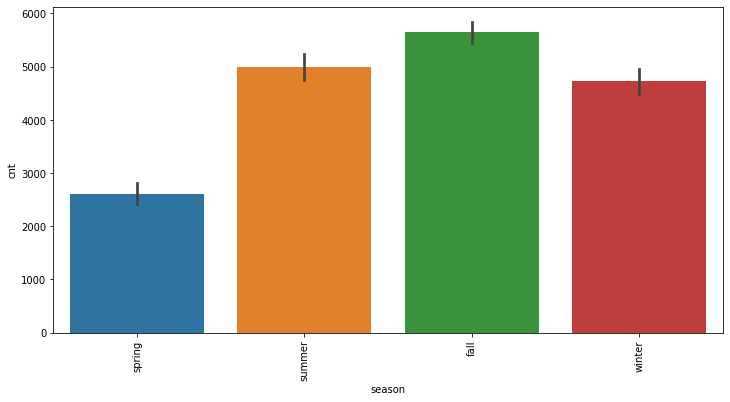

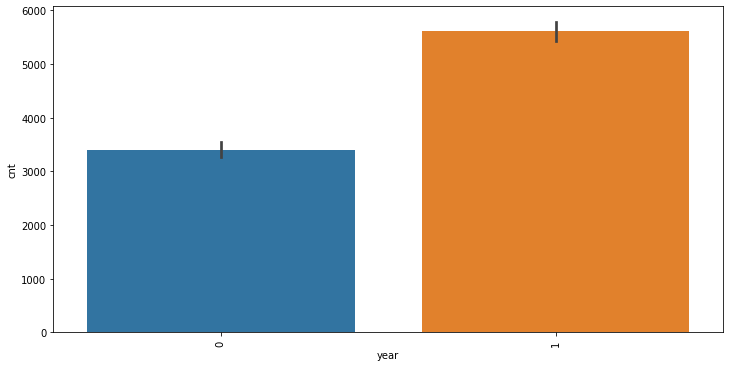

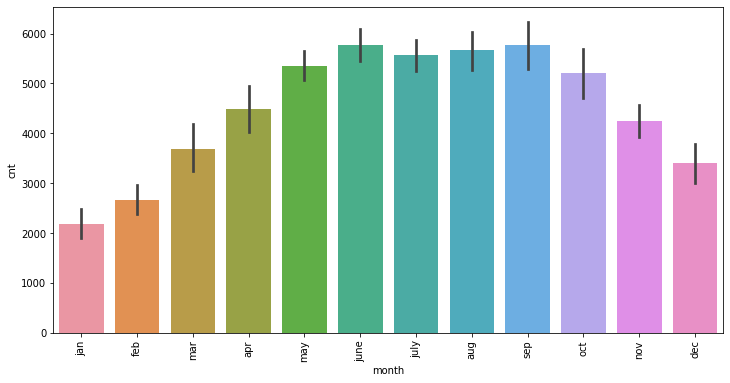

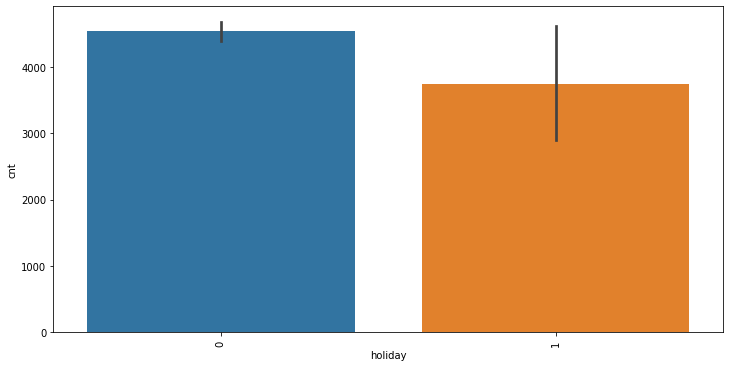

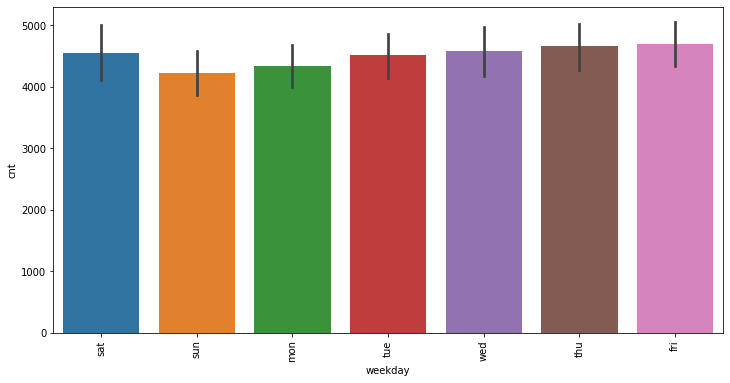

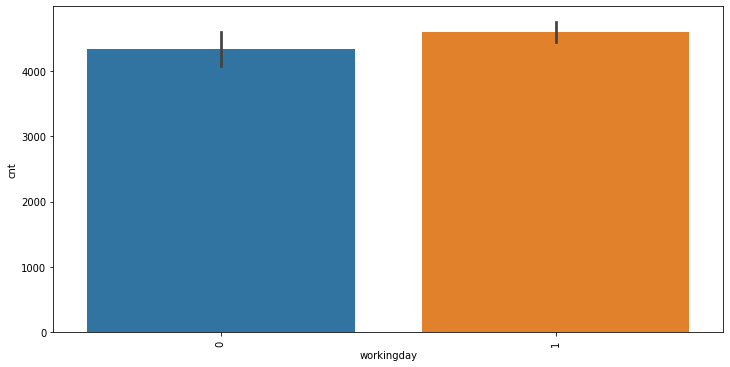

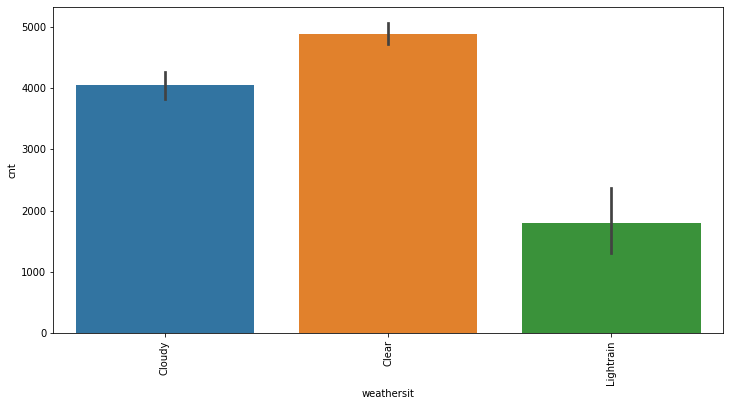

In [19]:
# Barplot for Categorical variables against count
for i, var in enumerate(cat_var):
    plt.figure(figsize=(12,6))
    sns.barplot(x=var, y='cnt', data=df)
    plt.xticks(rotation=90)
    plt.show()

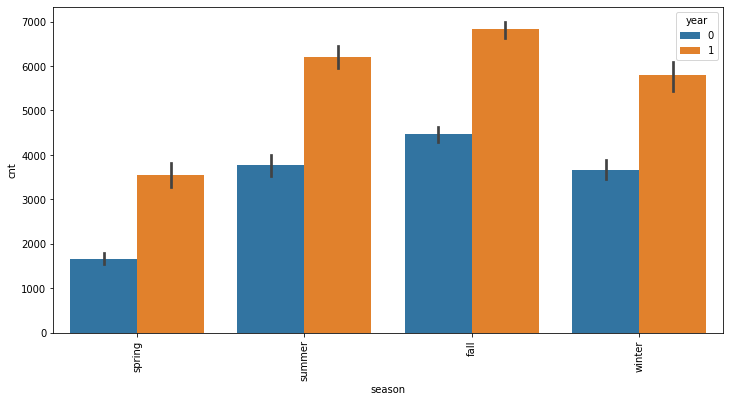

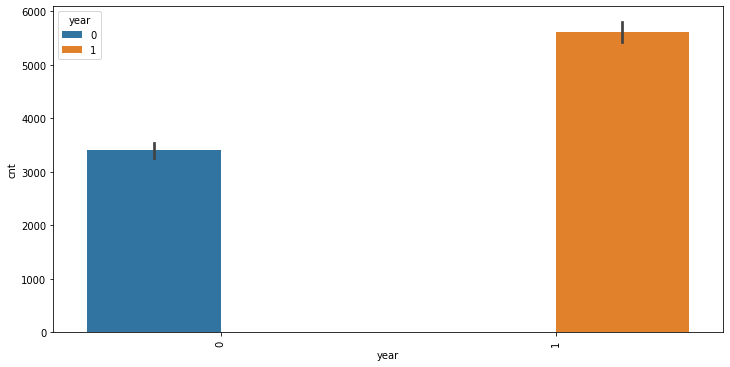

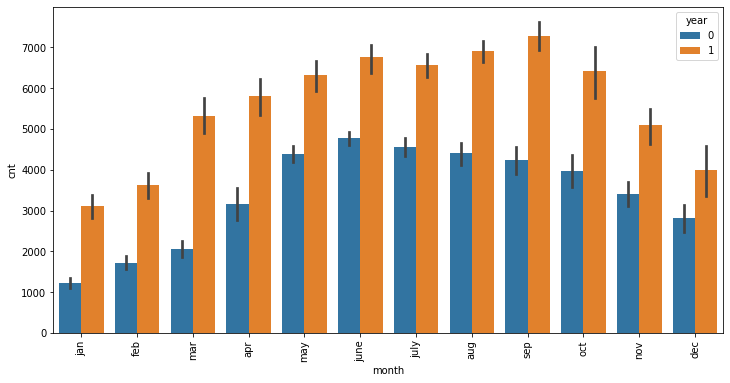

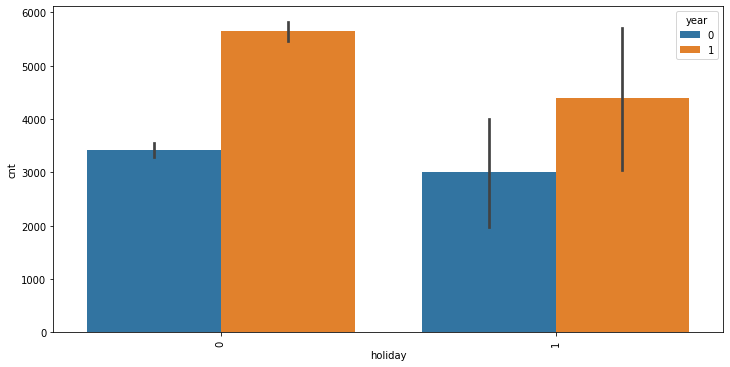

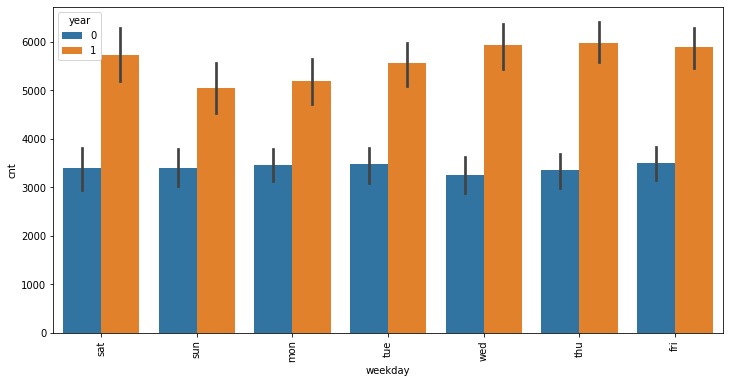

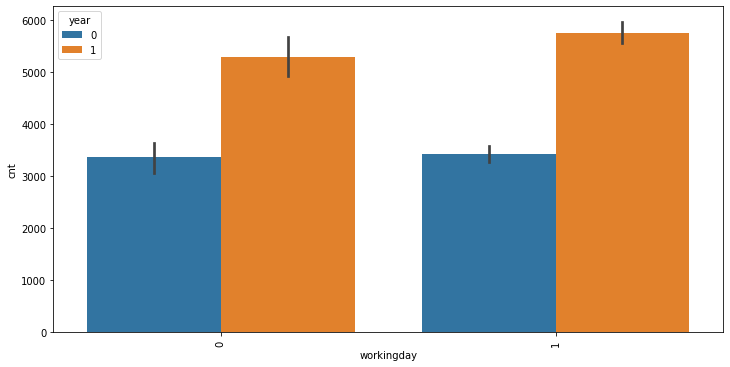

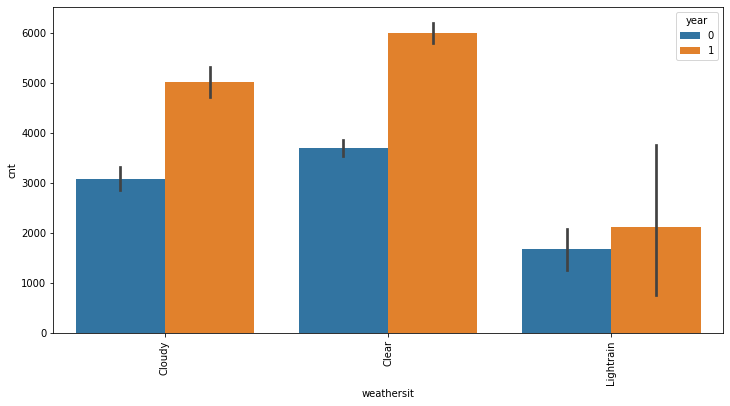

In [20]:
# Barplot for Categorical variables against count for year 2018 & 2019
for i, var in enumerate(cat_var):
    plt.figure(figsize=(12,6))
    sns.barplot(x=var, y='cnt', hue = 'year', data=df)
    plt.xticks(rotation=90)
    plt.show()

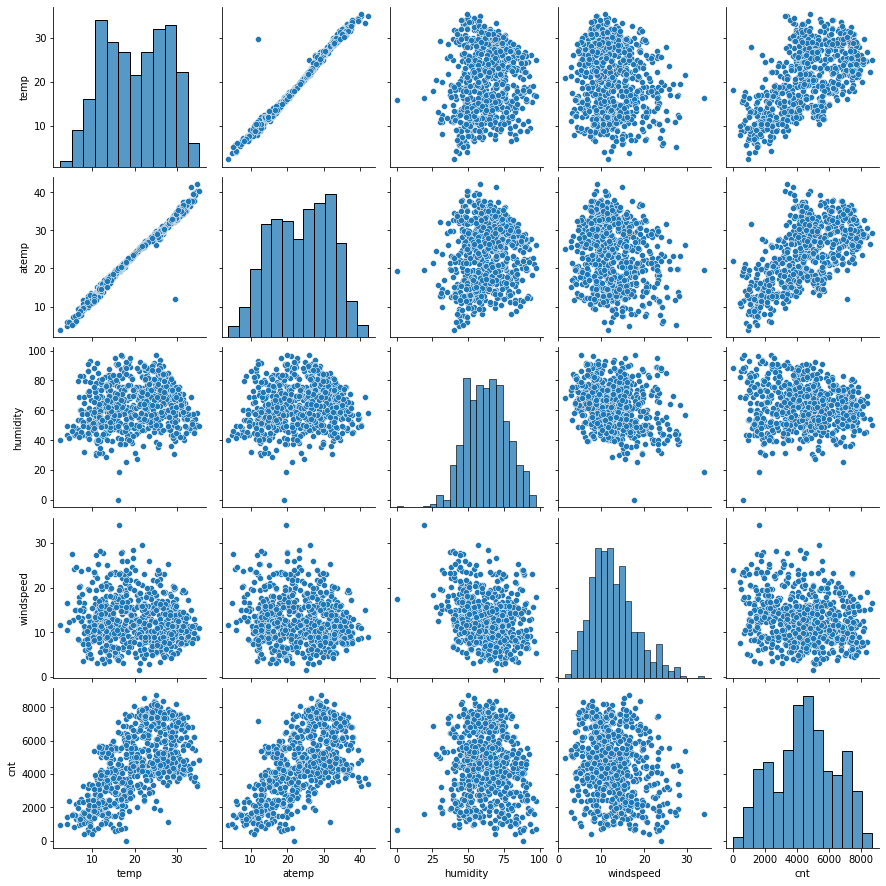

In [21]:
#Declaring continuous variable and creating pairplot to visualize the relationship
con_var = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt']
sns.pairplot(data=df,vars=con_var)
plt.show()

<AxesSubplot:>

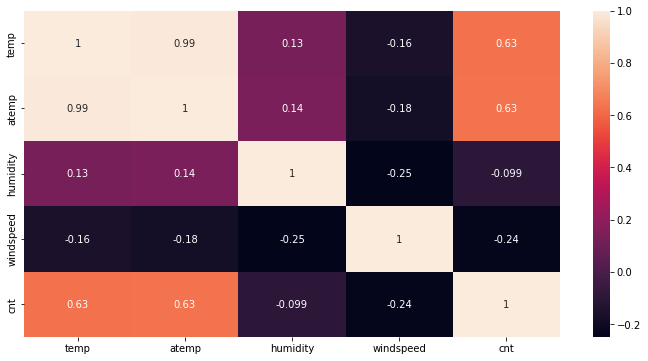

In [22]:
# to identify the correlation between Continuous variables
plt.figure(figsize=(12,6))
sns.heatmap(df[con_var].corr(),annot=True)

### Data Preparation

In [23]:
#Based upon above analysis, we are going to create dummy variables for major categorical variables which could 
#influence the model
df_month=pd.get_dummies(df.month,drop_first=True)
df_weekday=pd.get_dummies(df.weekday,drop_first=True)
df_weathersit=pd.get_dummies(df.weathersit,drop_first=True)
df_season=pd.get_dummies(df.season,drop_first=True)

In [24]:
# Merging  the dataframe, with the dummy variable dataset. 
df1 = pd.concat([df,df_month,df_weekday,df_weathersit,df_season],axis=1)

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  aug         730 non-null    uint8  
 13  dec         730 non-null    uint8  
 14  feb         730 non-null    uint8  
 15  jan         730 non-null    uint8  
 16  july        730 non-null    uint8  
 17  june        730 non-null    uint8  
 18  mar         730 non-null    uint8  
 19  may         730 non-null    u

In [26]:
df1.shape

(730, 34)

In [27]:
df1.head(10)

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Cloudy,Lightrain,spring,summer,winter
0,spring,0,jan,0,sat,0,Cloudy,14.110847,18.18125,80.5833,...,1,0,0,0,0,1,0,1,0,0
1,spring,0,jan,0,sun,0,Cloudy,14.902598,17.68695,69.6087,...,0,1,0,0,0,1,0,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0
5,spring,0,jan,0,thu,1,Clear,8.378268,11.66045,51.8261,...,0,0,1,0,0,0,0,1,0,0
6,spring,0,jan,0,fri,1,Cloudy,8.057402,10.44195,49.8696,...,0,0,0,0,0,1,0,1,0,0
7,spring,0,jan,0,sat,0,Cloudy,6.765000,8.11270,53.5833,...,1,0,0,0,0,1,0,1,0,0
8,spring,0,jan,0,sun,0,Clear,5.671653,5.80875,43.4167,...,0,1,0,0,0,0,0,1,0,0
9,spring,0,jan,0,mon,1,Clear,6.184153,7.54440,48.2917,...,0,0,0,0,0,0,0,1,0,0


In [28]:
#Dropping all variables that are not required for model prediction 
#mnth, weekday, weathersit, season, instant, dteday, casual, registered
df1.drop(['month', 'weekday', 'weathersit', 'season'],axis=1,inplace=True)

In [29]:
df1.shape

(730, 30)

### Creating Training & Testing Dataset

In [30]:
#Splitting the new dataset in to train & test 
np.random.seed(0)
df_train, df_test = train_test_split(df1, train_size = 0.7, random_state = 100)

In [31]:
df_train.shape

(510, 30)

In [32]:
df_test.shape

(220, 30)

#### Rescaling the features

In [33]:
scaler = MinMaxScaler()

In [34]:
df1.head(10)

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Cloudy,Lightrain,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,1,0,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,1,0,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0
5,0,0,1,8.378268,11.66045,51.8261,6.000868,1606,0,0,...,0,0,1,0,0,0,0,1,0,0
6,0,0,1,8.057402,10.44195,49.8696,11.304642,1510,0,0,...,0,0,0,0,0,1,0,1,0,0
7,0,0,0,6.765000,8.11270,53.5833,17.875868,959,0,0,...,1,0,0,0,0,1,0,1,0,0
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,0,0,...,0,1,0,0,0,0,0,1,0,0
9,0,0,1,6.184153,7.54440,48.2917,14.958889,1321,0,0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
#Applying the scalar to all continuous variables 
df_train[con_var] = scaler.fit_transform(df_train[con_var])

In [36]:
df_train.head(10)

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Cloudy,Lightrain,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,1,0,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,1,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,1,0,0,1,0
580,1,0,0,0.914852,0.882350,0.632030,0.462538,0.782559,1,0,...,1,0,0,0,0,0,0,0,0,0
500,1,0,1,0.719639,0.678508,0.719193,0.172431,0.851588,0,0,...,0,0,0,0,1,0,0,0,1,0
479,1,0,1,0.520271,0.513565,0.440962,0.164434,0.710308,0,0,...,0,0,0,0,1,0,0,0,1,0
472,1,0,1,0.503656,0.496135,0.586518,0.270032,0.499885,0,0,...,0,0,0,0,1,1,0,0,1,0
455,1,0,0,0.456929,0.443956,0.696865,0.279394,0.692476,0,0,...,0,1,0,0,0,1,0,0,1,0


<AxesSubplot:>

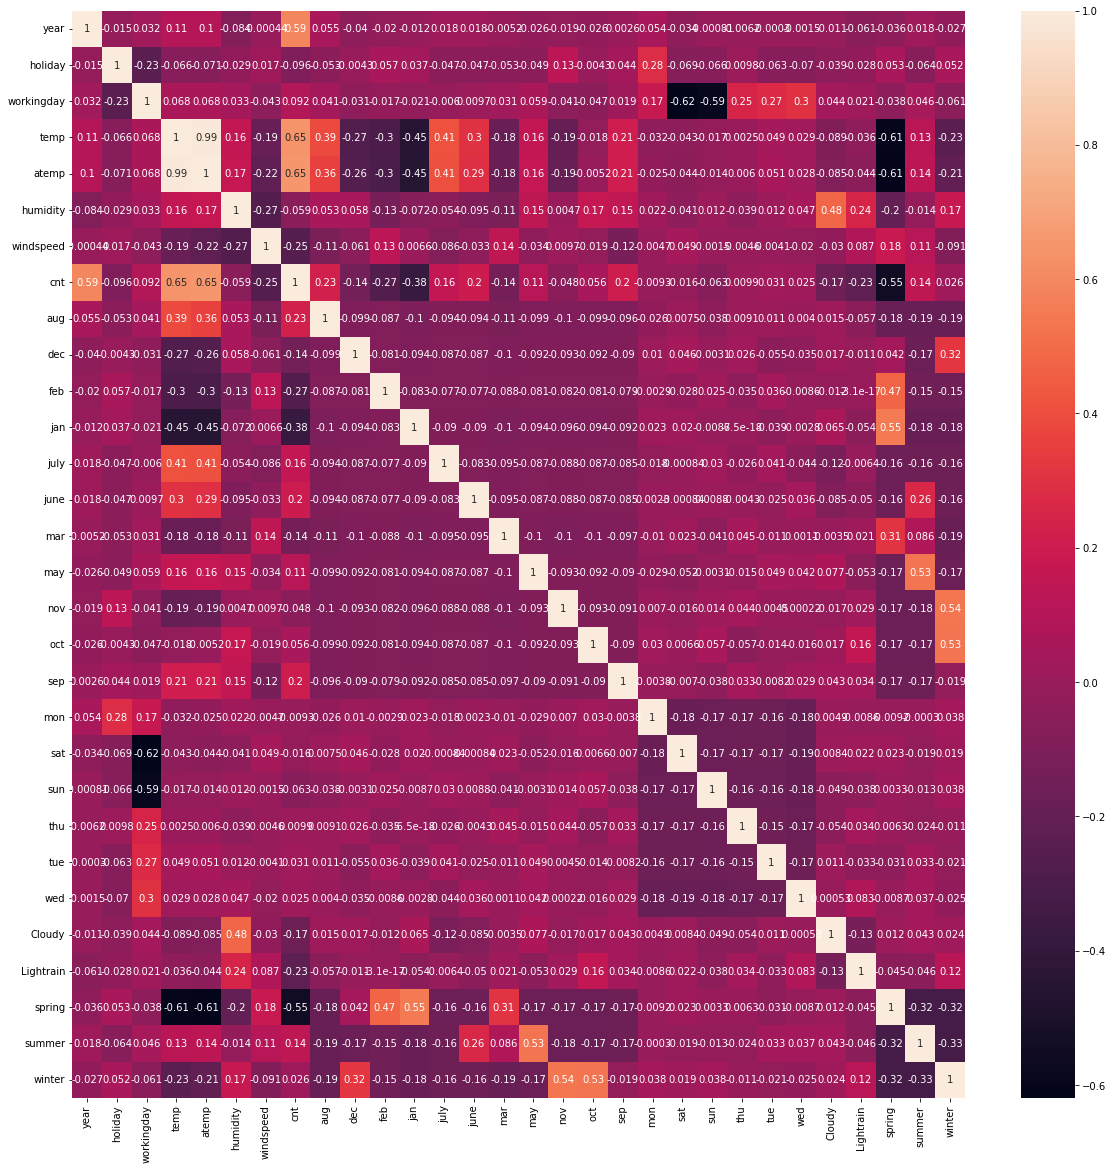

In [37]:
#Check the Correlation between two variables in training dataset
plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr(),annot=True)

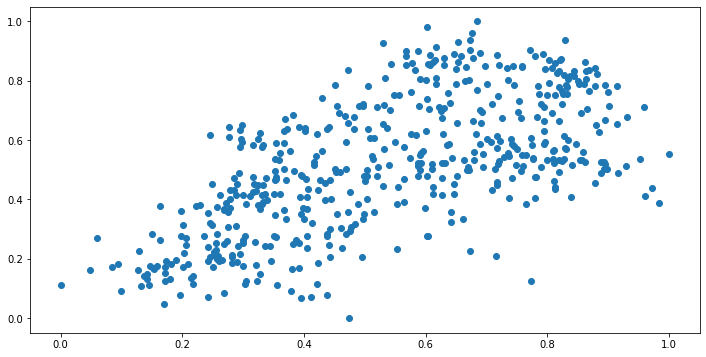

In [38]:
# Visualizing the correlation on a scatterplot

plt.figure(figsize=[12,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

### Building Linear Model

In [39]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

In [40]:
X_train.shape

(510, 29)

In [41]:
y_train.shape

(510,)

In [42]:
y_train.describe

<bound method NDFrame.describe of 576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Name: cnt, Length: 510, dtype: float64>

In [43]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,aug,dec,feb,...,sat,sun,thu,tue,wed,Cloudy,Lightrain,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.096078,0.084314,0.066667,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.345098,0.029412,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.294988,0.278131,0.249689,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.475867,0.169124,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
#Now applying Recursive Feature Elimination (RFE) for selecting most important variable in the dataset
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [45]:
# Listing the variables
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 9),
 ('dec', False, 5),
 ('feb', False, 6),
 ('jan', False, 3),
 ('july', False, 2),
 ('june', False, 14),
 ('mar', False, 16),
 ('may', False, 7),
 ('nov', False, 4),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 10),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 12),
 ('tue', False, 11),
 ('wed', False, 15),
 ('Cloudy', True, 1),
 ('Lightrain', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [46]:
# Printing the variables required as essential for the RFE algorithm
col_support = X_train.columns[rfe.support_]
col_ranking = X_train.columns[rfe.ranking_]
print(col_support)
print(col_ranking)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'sep',
       'sat', 'sun', 'Cloudy', 'Lightrain', 'spring', 'summer', 'winter'],
      dtype='object')
Index(['holiday', 'holiday', 'holiday', 'holiday', 'dec', 'holiday', 'holiday',
       'feb', 'humidity', 'windspeed', 'temp', 'workingday', 'may', 'oct',
       'aug', 'atemp', 'mar', 'holiday', 'jan', 'holiday', 'holiday', 'june',
       'july', 'nov', 'holiday', 'holiday', 'holiday', 'holiday', 'holiday'],
      dtype='object')


In [47]:
#Funciton to calculate VIF
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [48]:
#choosing the DF with RFE variables 
X_train_rfe = X_train[col_support]

In [49]:
X_train_rfe.describe()

,year,holiday,workingday,temp,humidity,windspeed,sep,sat,sun,Cloudy,Lightrain,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.080392,0.154902,0.143137,0.345098,0.029412,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.272166,0.362166,0.350557,0.475867,0.169124,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
#Calculating VIF for the DF with RFE variables 
calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,49.97
7,sat,12.02
8,sun,11.60
11,spring,4.84
3,temp,3.53
13,winter,3.27
1,holiday,2.88
12,summer,2.29
4,humidity,1.90
9,Cloudy,1.57


In [51]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.7
Date:                Wed, 17 May 2023   Prob (F-statistic):          1.29e-190
Time:                        23:19:52   Log-Likelihood:                 512.96
No. Observations:                 510   AIC:                            -997.9
Df Residuals:                     496   BIC:                            -938.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1895      0.028      6.832      0.0

In [52]:
# Since workingday shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['workingday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,humidity,28.25
2,temp,14.85
4,windspeed,4.68
10,spring,3.94
12,winter,3.20
11,summer,2.46
8,Cloudy,2.30
0,year,2.08
5,sep,1.28
9,Lightrain,1.24


In [53]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.7
Date:                Wed, 17 May 2023   Prob (F-statistic):          1.29e-190
Time:                        23:19:53   Log-Likelihood:                 512.96
No. Observations:                 510   AIC:                            -997.9
Df Residuals:                     496   BIC:                            -938.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2710      0.034      7.935      0.0

In [54]:
# As 'humidity' shows high VIF values hence we can drop it
X_train_new = X_train_new.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.62
2,temp,3.96
0,year,2.07
9,spring,2.04
10,summer,1.91
11,winter,1.68
7,Cloudy,1.55
4,sep,1.23
5,sat,1.23
6,sun,1.22


In [55]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.7
Date:                Wed, 17 May 2023   Prob (F-statistic):          3.16e-188
Time:                        23:19:53   Log-Likelihood:                 504.48
No. Observations:                 510   AIC:                            -983.0
Df Residuals:                     497   BIC:                            -927.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1958      0.029      6.694      0.0

In [56]:
#Dropping p values in model is part of the process of feature selection or variable elimination.
# As 'sat' shows high VIF values hence we can drop it
X_train_new = X_train_new.drop(['sat'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.91
0,year,2.07
8,spring,2.02
9,summer,1.91
10,winter,1.66
6,Cloudy,1.55
4,sep,1.23
5,sun,1.18
7,Lightrain,1.08


In [57]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.2
Date:                Wed, 17 May 2023   Prob (F-statistic):          3.23e-189
Time:                        23:19:53   Log-Likelihood:                 503.99
No. Observations:                 510   AIC:                            -984.0
Df Residuals:                     498   BIC:                            -933.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1981      0.029      6.794      0.0

In [58]:
print(lr_4.params)

const        0.198086
year         0.234000
holiday     -0.104300
temp         0.478161
windspeed   -0.148022
sep          0.089359
sun         -0.049479
Cloudy      -0.080899
Lightrain   -0.290403
spring      -0.054372
summer       0.062284
winter       0.096907
dtype: float64


### Residual Analysis

In [59]:
print(X_train_lm_4)

     const  year  holiday      temp  windspeed  sep  sun  Cloudy  Lightrain  \
576    1.0     1        0  0.815169   0.264686    0    0       0          0   
426    1.0     1        0  0.442393   0.255342    0    0       1          0   
728    1.0     1        0  0.245101   0.663106    0    1       0          0   
482    1.0     1        0  0.395666   0.188475    0    0       1          0   
111    1.0     0        0  0.345824   0.380981    0    0       1          0   
..     ...   ...      ...       ...        ...  ...  ...     ...        ...   
578    1.0     1        0  0.863973   0.187140    0    0       0          0   
53     1.0     0        0  0.202618   0.111379    0    0       0          0   
350    1.0     0        0  0.248216   0.431816    0    0       1          0   
79     1.0     0        0  0.462664   0.529881    0    0       1          0   
520    1.0     1        0  0.600225   0.359599    0    0       1          0   

     spring  summer  winter  
576       0       0  

In [60]:
y_train_pred = lr_4.predict(X_train_lm_4)

Text(0.5, 0, 'Errors')

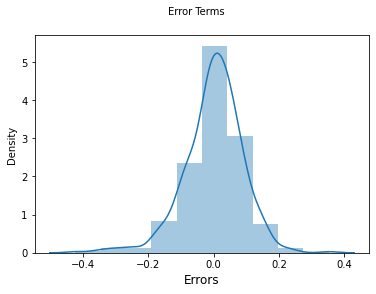

In [61]:
# Plotting histogram for error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 10)
fig.suptitle('Error Terms', fontsize = 10) 
plt.xlabel('Errors', fontsize = 12)

In [62]:
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.91
0,year,2.07
8,spring,2.02
9,summer,1.91
10,winter,1.66
6,Cloudy,1.55
4,sep,1.23
5,sun,1.18
7,Lightrain,1.08


<AxesSubplot:>

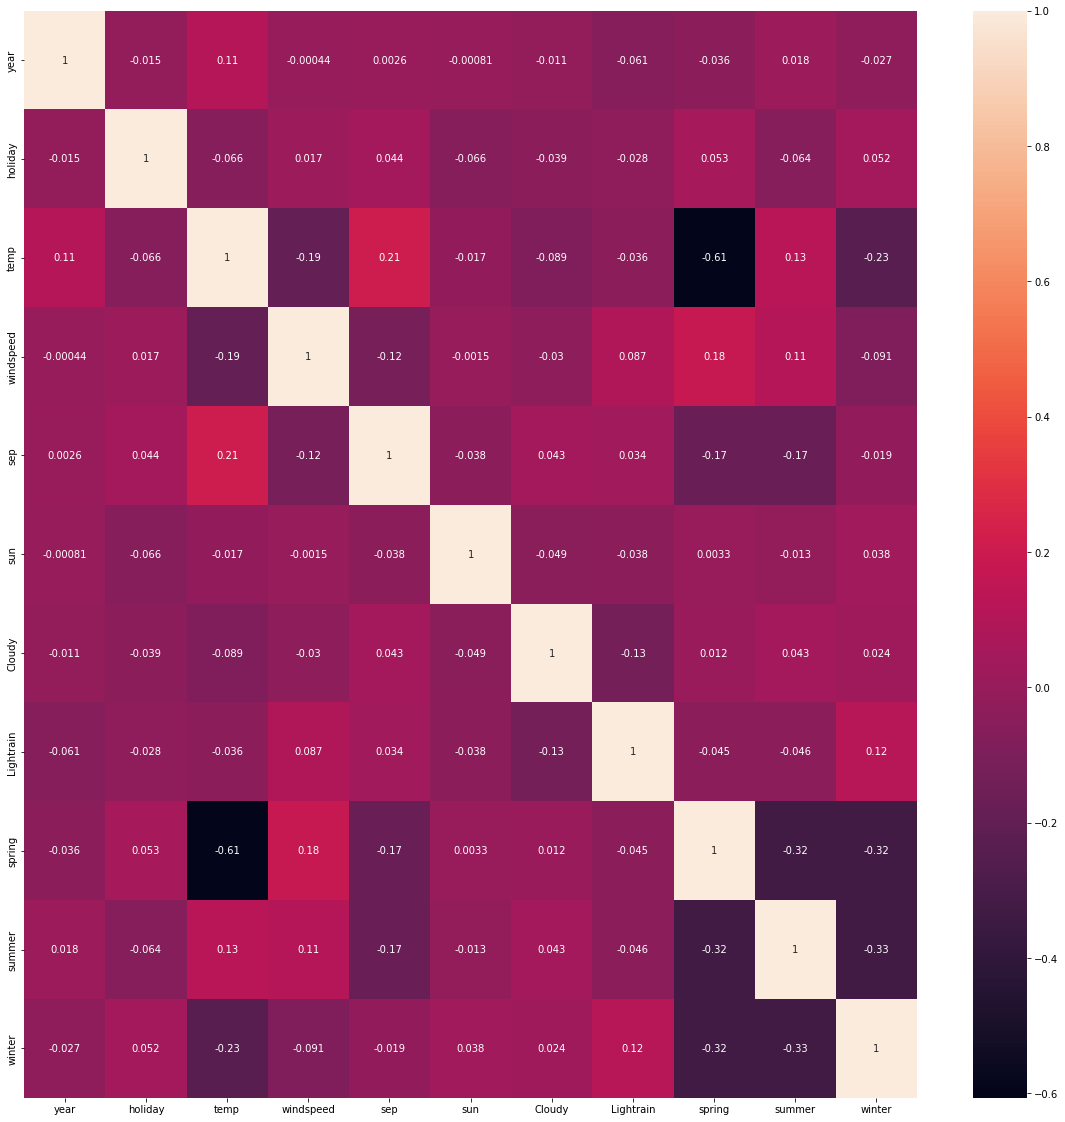

In [63]:
#Correlation on the varibles using heatmap for which has variables with low VIF values 
plt.figure(figsize=(20,20))
sns.heatmap(X_train_new.corr(),annot=True)

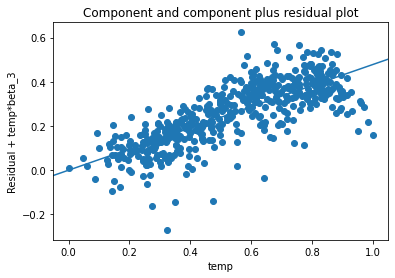

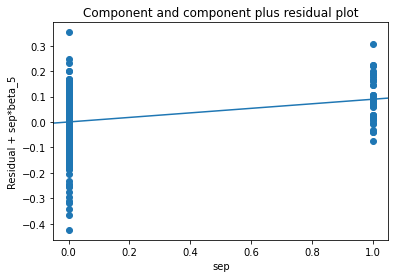

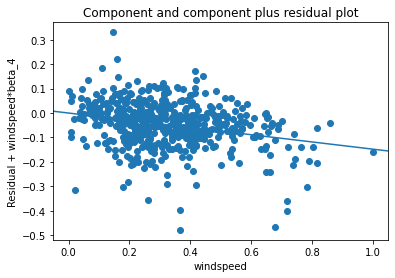

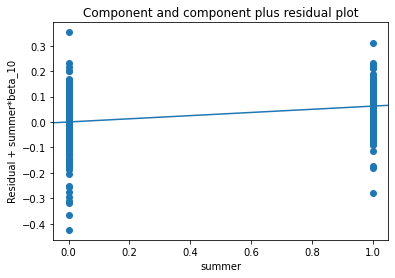

In [64]:
#To assess the relationship between an independent variable and the response variable using CCPR plot
sm.graphics.plot_ccpr(lr_4, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_4, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_4, 'windspeed')
plt.show()

sm.graphics.plot_ccpr(lr_4, 'summer')
plt.show()

### Predicting using final model

In [65]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Cloudy,Lightrain,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,1,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [66]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Cloudy,Lightrain,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.318182,0.027273,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.466833,0.163248,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
y_test = df_test.pop('cnt')
X_test = df_test

In [68]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_4 = sm.add_constant(X_test)

In [69]:
y_pred = lr_4.predict(X_test_lm_4)

In [70]:
#calculating the coefficient of determination (R-squared) for evaluating the performance of a regression model.
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8066

### Model Evaluvation using principles

Text(0, 0.5, 'y_pred')

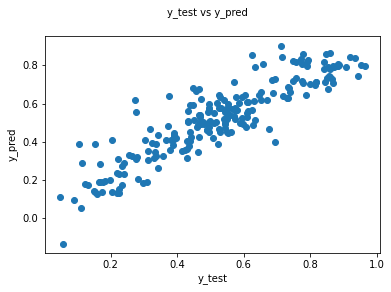

In [71]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 10) 
plt.xlabel('y_test', fontsize = 10)
plt.ylabel('y_pred', fontsize = 10)

In [72]:
round(lr_4.params,4)

const        0.1981
year         0.2340
holiday     -0.1043
temp         0.4782
windspeed   -0.1480
sep          0.0894
sun         -0.0495
Cloudy      -0.0809
Lightrain   -0.2904
spring      -0.0544
summer       0.0623
winter       0.0969
dtype: float64

In [73]:
# Calculating Adjusted R-squared value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7963


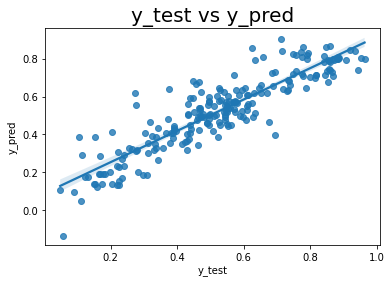

In [74]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, fit_reg=True)
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=10)
plt.ylabel('y_pred', fontsize=10)
plt.show()

##### Conclusion
Demand of the bikes are dependent on following variables
Year
Holiday
Temp
Windspeed
Months (Sep)
Climate (Cloudy, Lightrain, spring, summer, winter)